In [2]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('@Cleaned_healthcare_dataset.csv')


In [5]:
# Display the first few rows and column names to understand the structure
data_info = data.info()
data_head = data.head()
data_columns = data.columns

data_info, data_head, data_columns.tolist()  # Display dataset info and columns to guide feature engineering


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                51000 non-null  object 
 1   Age                 51000 non-null  int64  
 2   Gender              51000 non-null  int64  
 3   Blood Type          51000 non-null  int64  
 4   Medical Condition   51000 non-null  int64  
 5   Date of Admission   51000 non-null  object 
 6   Doctor              51000 non-null  int64  
 7   Hospital            51000 non-null  int64  
 8   Insurance Provider  51000 non-null  int64  
 9   Billing Amount      51000 non-null  float64
 10  Room Number         51000 non-null  int64  
 11  Admission Type      51000 non-null  int64  
 12  Discharge Date      51000 non-null  object 
 13  Medication          51000 non-null  int64  
 14  Test Results        51000 non-null  int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 5.8

(None,
         Name  Age  Gender  Blood Type  Medical Condition Date of Admission  \
 0  Patient_0   58       1           7                  3          1/1/2023   
 1  Patient_1   71       0           7                  1          1/2/2023   
 2  Patient_2   48       0           1                  2          1/3/2023   
 3  Patient_3   34       1           3                  0          1/4/2023   
 4  Patient_4   62       0           5                  3          1/5/2023   
 
    Doctor  Hospital  Insurance Provider  Billing Amount  Room Number  \
 0       3         3                   1       10.668620          229   
 1       7         0                   4        9.981405          431   
 2       7         0                   0       10.139826          277   
 3       7         3                   0       10.146779          372   
 4       4         3                   0       10.469040          390   
 
    Admission Type Discharge Date  Medication  Test Results  
 0             

In [7]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(data.describe())

# Summary statistics for categorical columns
print("Summary statistics for categorical columns:")
print(data.describe(include=['object']))


Summary statistics for numerical columns:
                Age        Gender    Blood Type  Medical Condition  \
count  51000.000000  51000.000000  51000.000000       51000.000000   
mean      49.527373      0.497039      3.486765           1.501765   
std       17.286295      0.499996      2.296213           1.116025   
min       20.000000      0.000000      0.000000           0.000000   
25%       35.000000      0.000000      1.000000           1.000000   
50%       49.000000      0.000000      3.000000           2.000000   
75%       65.000000      1.000000      5.000000           2.000000   
max       79.000000      1.000000      7.000000           3.000000   

             Doctor      Hospital  Insurance Provider  Billing Amount  \
count  51000.000000  51000.000000         51000.00000    51000.000000   
mean       3.507176      1.992980             2.00149        9.902057   
std        2.298237      1.416524             1.41370        0.825625   
min        0.000000      0.000000  

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

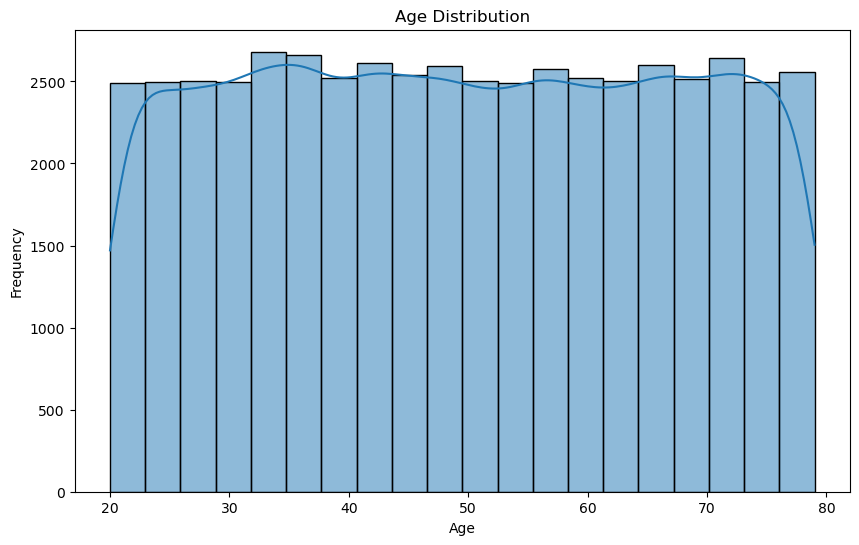

In [4]:
# Plot the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


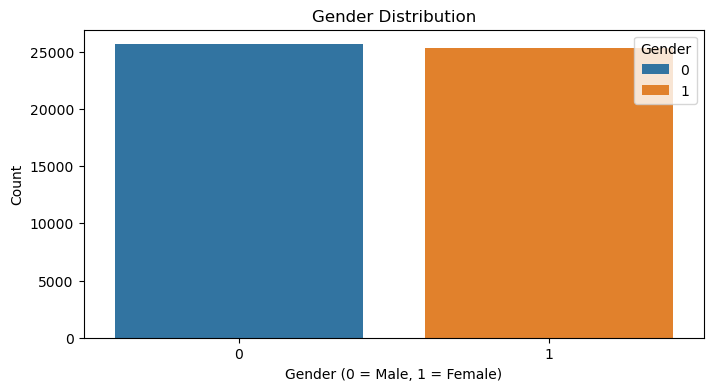

In [15]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Gender', hue='Gender', dodge=False)
plt.title("Gender Distribution")
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.ylabel("Count")
plt.legend(title="Gender", loc='upper right')
plt.show()



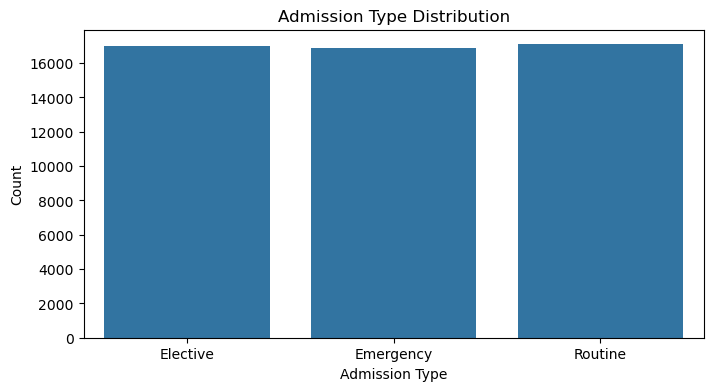

In [17]:
# Mapping numeric codes to labels
admission_type_labels = {0: 'Elective', 1: 'Emergency', 2: 'Routine'}
data['Admission Type Label'] = data['Admission Type'].map(admission_type_labels)

# Plot with meaningful labels
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Admission Type Label')
plt.title("Admission Type Distribution")
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.show()


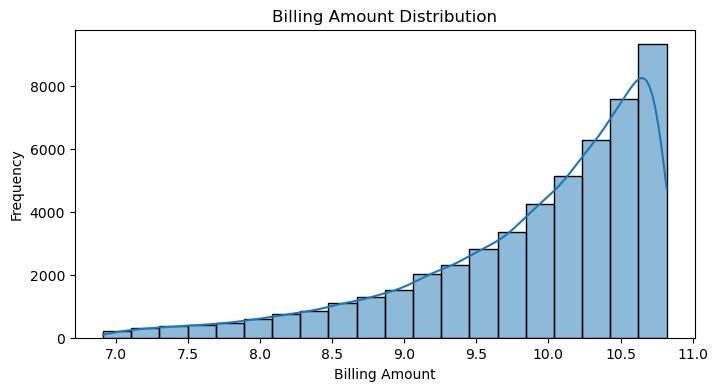

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(data['Billing Amount'], kde=True, bins=20)
plt.title("Billing Amount Distribution")
plt.xlabel("Billing Amount")
plt.ylabel("Frequency")
plt.show()


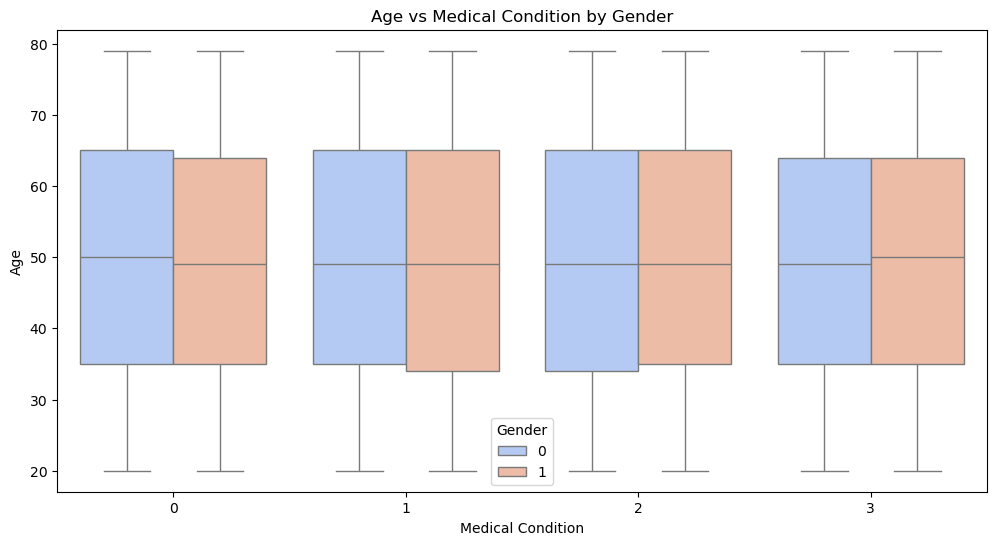

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Medical Condition', y='Age', hue='Gender', palette="coolwarm")
plt.title("Age vs Medical Condition by Gender")
plt.xlabel("Medical Condition")
plt.ylabel("Age")
plt.legend(title="Gender")
plt.show()



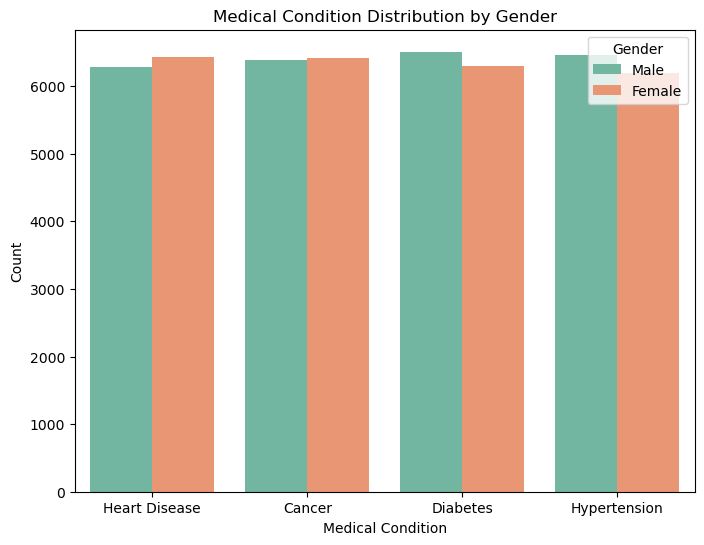

In [20]:
# Map the medical condition codes to their descriptions
medical_condition_mapping = {
    0: "Hypertension",
    1: "Cancer",
    2: "Diabetes",
    3: "Heart Disease"
}

data['Medical Condition'] = data['Medical Condition'].map(medical_condition_mapping)

# Plot the updated chart
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Medical Condition', hue='Gender', palette="Set2")
plt.title("Medical Condition Distribution by Gender")
plt.xlabel("Medical Condition")
plt.ylabel("Count")
plt.legend(title="Gender", labels=["Male", "Female"])
plt.show()



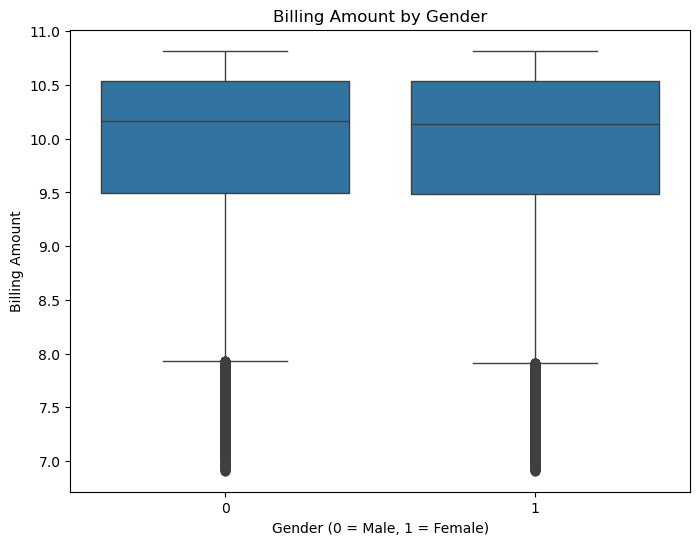

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Gender', y='Billing Amount')
plt.title("Billing Amount by Gender")
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.ylabel("Billing Amount")
plt.show()




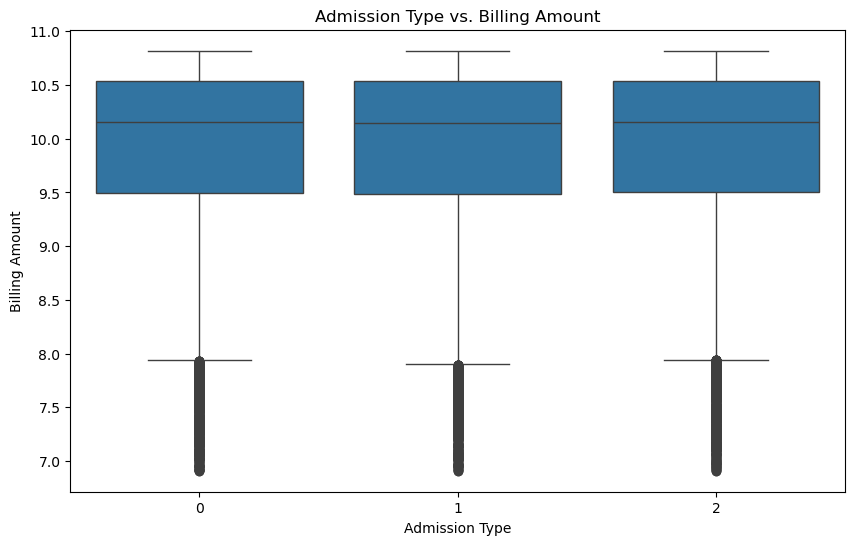

In [23]:
# Admission Type vs. Billing Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='Admission Type', y='Billing Amount', data=data)
plt.title('Admission Type vs. Billing Amount')
plt.xlabel('Admission Type')
plt.ylabel('Billing Amount')
plt.show()


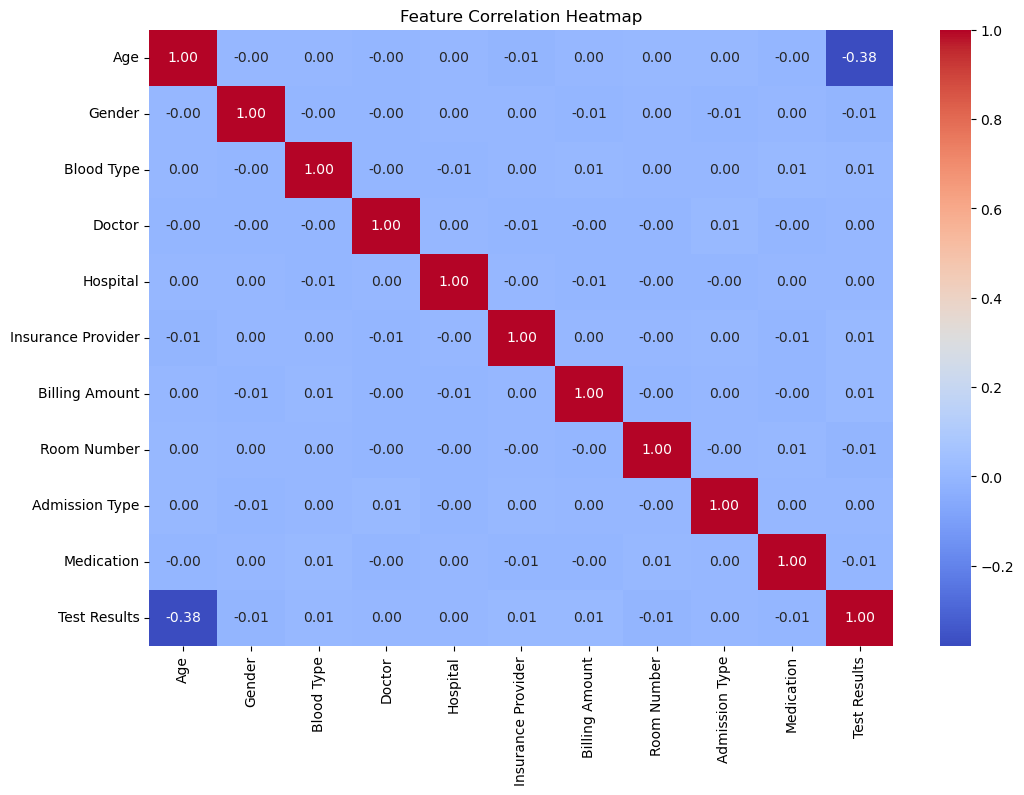

In [24]:
# Correct the usage of the DataFrame
numeric_cols_latest = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix_latest = data[numeric_cols_latest].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_latest, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()
